In [ ]:
## Standard libraries
import os
import math
import numpy as np
import time
from fastcore.all import *
# Configure environment
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE']='false' # Tells Jax not to hog all of the memory to this process.

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.auto import tqdm

## project specifics
import diffusion_curvature
import pygsp
import jax
import jax.numpy as jnp
jax.devices()

from diffusion_curvature.graphs import *
from diffusion_curvature.datasets import *
from diffusion_curvature.core_jax import *
from diffusion_curvature.utils import *
from diffusion_curvature.comparison_space import *


ModuleNotFoundError: No module named 'fastcore'

# 3a A Visual Battery of Benchmarks
> 2 Manifolds, colored by curvature, neatly compared

Here is the curvature equivalent of the "sniff test": does our technique appropriately color the most basic 2 manifolds? This notebook implements this comparison, making it easy to swap in and out curvature methods and rerun them on every baseline.

In [ ]:
# Establish Datasets
n_points = 5000
Xs = {}
Ks = {}
Xs['torus'], Ks['torus'] = torus(n_points, use_guide_points=True)
Xs['plane'] = plane(n_points, dim=2)
Xs['paraboloid'], Ks['paraboloid'] = paraboloid(n_points, use_guide_points=True)
Xs['plane'], Ks['plane'] = sphere(n_points)
Xs['ellipsoid'], Ks['ellipsoid'] = ellipsoid(n_points)
Xs['hyperboloid'], Ks['hyperboloid'] = hyperboloid(n_points)

# Curvature Across Time

In [ ]:
from diffusion_curvature.comparison_space import *

## With Same parameter fitting

  0%|          | 0/19 [00:00<?, ?it/s]

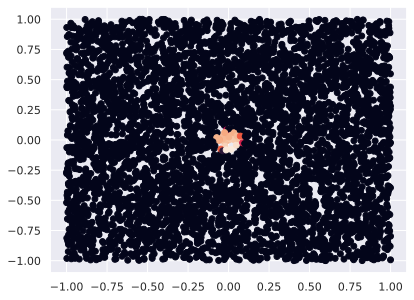

In [ ]:
G_plane = get_alpha_decay_graph(Xs['plane'], knn=30, anisotropy=1, )
G_flat = euclidean_comparison_graph(G_plane,dimension=2)
P = diffusion_matrix_from_affinities(G_plane.K.todense())
plt.scatter(Xs['plane'][:,0],Xs['plane'][:,1],c=P[0])
ts = np.arange(1,20)
DC = DiffusionCurvature(laziness_method="Entropic",comparison_space_size_factor=2,comparison_method="Subtraction",use_graphs_kernel_parameters=False)
uks = []
flat_uks = []
for t in tqdm(ts):
    uks += [float(DC.unsigned_curvature(G_plane,t)[0])]
    flat_uks += [float(DC.unsigned_curvature(G_flat,t)[0])]

In [ ]:
G_flat.get_params()

{'n_pca': None,
 'random_state': None,
 'kernel_symm': '+',
 'theta': None,
 'anisotropy': 0,
 'knn': 5,
 'decay': 40,
 'bandwidth': None,
 'bandwidth_scale': 1.0,
 'distance': 'euclidean',
 'precomputed': 'affinity'}

In [ ]:
G_plane.get_params()

{'n_pca': None,
 'random_state': None,
 'kernel_symm': '+',
 'theta': None,
 'anisotropy': 0,
 'knn': 5,
 'decay': 40,
 'bandwidth': None,
 'bandwidth_scale': 1.0,
 'distance': 'euclidean',
 'precomputed': 'affinity'}

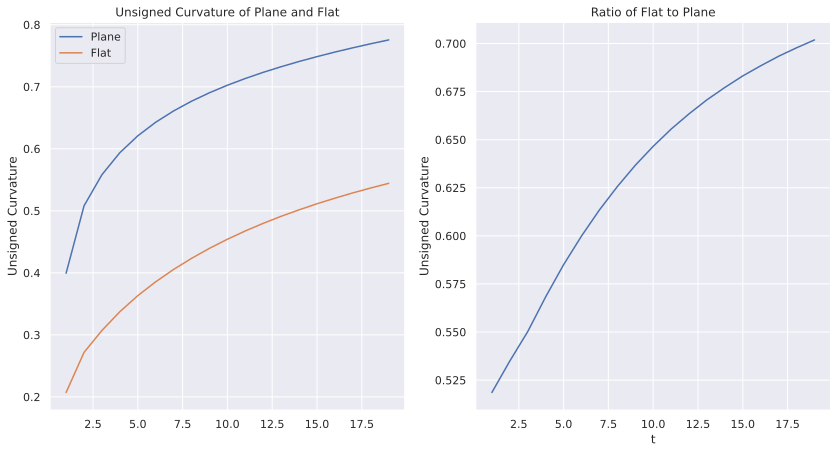

In [ ]:
# plot uks and flat_uks on the same graph, with labels
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].plot(ts,uks,label="Plane")
axs[0].plot(ts,flat_uks,label="Flat")
axs[0].legend()

axs[0].set_ylabel("Unsigned Curvature")
axs[0].set_title("Unsigned Curvature of Plane and Flat")

# Plot the ratio flat_uks/uks
axs[1].plot(ts,np.array(flat_uks)/np.array(uks))
axs[1].set_xlabel("t")
axs[1].set_ylabel("Unsigned Curvature")    
axs[1].set_title("Ratio of Flat to Plane")

plt.show()

In [ ]:
G_plane = get_alpha_decay_graph(Xs['plane'], knn=30, anisotropy=1, )
G_flat = euclidean_comparison_graph(G_plane,dimension=2)
P = diffusion_matrix_from_affinities(G_plane.K.todense())
plt.scatter(Xs['plane'][:,0],Xs['plane'][:,1],c=P[0])
ts = np.arange(1,20)
DC = DiffusionCurvature(laziness_method="Entropic",comparison_space_size_factor=2,comparison_method="Subtraction",use_graphs_kernel_parameters=False)
uks = []
flat_uks = []
for t in tqdm(ts):
    uks += [float(DC.unsigned_curvature(G_plane,t)[0])]
    flat_uks += [float(DC.unsigned_curvature(G_flat,t)[0])]

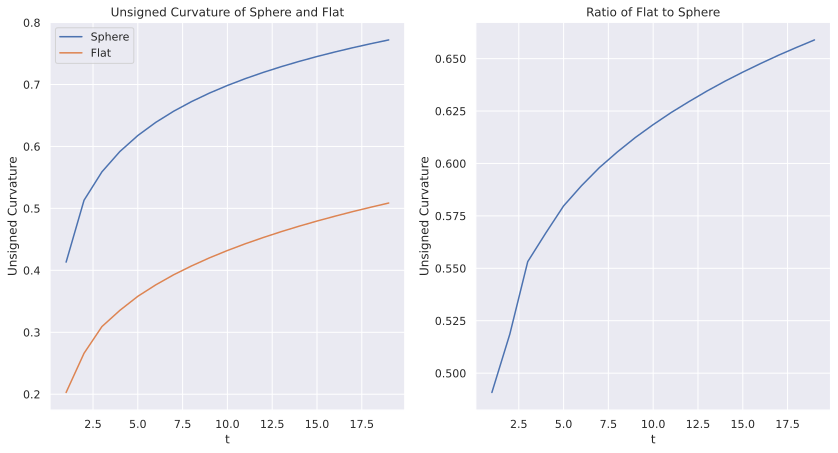

In [ ]:
# plot uks and flat_uks on the same graph, with labels
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].plot(ts,uks,label="plane")
axs[0].plot(ts,flat_uks,label="Flat")
axs[0].legend()
axs[0].set_xlabel("t")
axs[0].set_ylabel("Unsigned Curvature")
axs[0].set_title("Unsigned Curvature of plane and Flat")

# Plot the ratio flat_uks/uks
axs[1].plot(ts,np.array(flat_uks)/np.array(uks))
axs[1].set_xlabel("t")
axs[1].set_ylabel("Unsigned Curvature")    
axs[1].set_title("Ratio of Flat to plane")

plt.show()

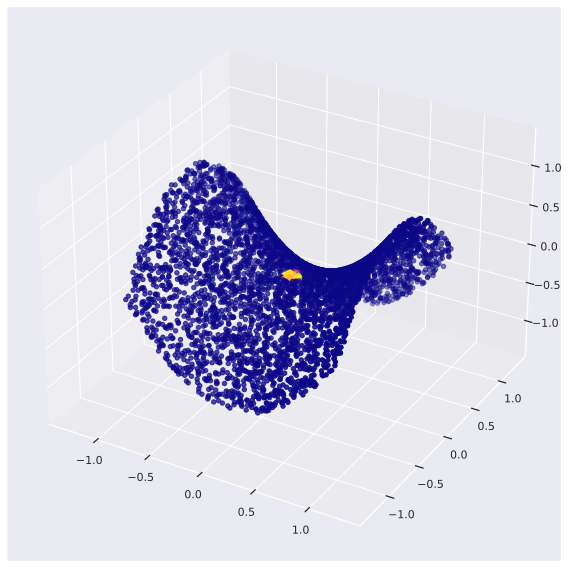

  0%|          | 0/19 [00:00<?, ?it/s]

In [ ]:
G_paraboloid = get_alpha_decay_graph(Xs['paraboloid'], knn=30, anisotropy=1, )
G_flat = euclidean_comparison_graph(G_paraboloid,dimension=2)
P = diffusion_matrix_from_affinities(G_paraboloid.K.todense())
plot_3d(Xs['paraboloid'], P[0])
ts = np.arange(1,20)
DC = DiffusionCurvature(laziness_method="Entropic",comparison_space_size_factor=2,comparison_method="Subtraction",use_graphs_kernel_parameters=False)
uks = []
flat_uks = []
for t in tqdm(ts):
    uks += [float(DC.unsigned_curvature(G_paraboloid,t)[0])]
    flat_uks += [float(DC.unsigned_curvature(G_flat,t)[0])]

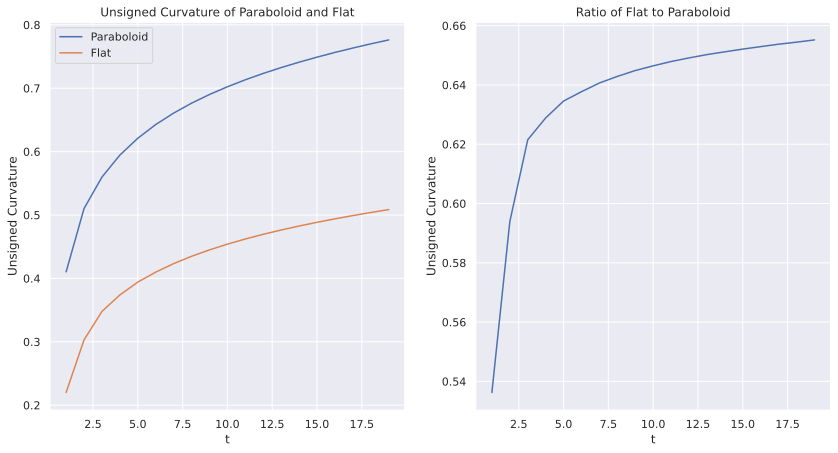

In [ ]:
# plot uks and flat_uks on the same graph, with labels
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].plot(ts,uks,label="Paraboloid")
axs[0].plot(ts,flat_uks,label="Flat")
axs[0].legend()
axs[0].set_xlabel("t")
axs[0].set_ylabel("Unsigned Curvature")
axs[0].set_title("Unsigned Curvature of Paraboloid and Flat")

# Plot the ratio flat_uks/uks
axs[1].plot(ts,np.array(flat_uks)/np.array(uks))
axs[1].set_xlabel("t")
axs[1].set_ylabel("Unsigned Curvature")    
axs[1].set_title("Ratio of Flat to Paraboloid")

plt.show()

## With Fitted Comparison Space

### Plane

{'params': {'kernel bandwidth': Array([0.03706357], dtype=float32)}}


  0%|          | 0/19 [00:00<?, ?it/s]

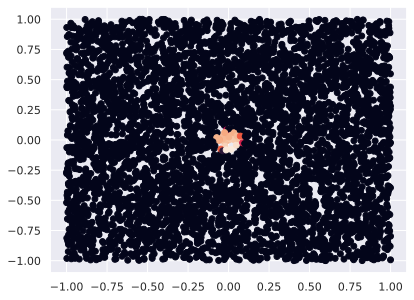

In [ ]:
plane = get_alpha_decay_graph(Xs['plane'], knn=30, anisotropy=1, )
jump_of_diffusion = DC.unsigned_curvature(G_plane,1)[0]
P = diffusion_matrix_from_affinities(G_plane.K.todense())
plt.scatter(Xs['plane'][:,0],Xs['plane'][:,1],c=P[0])
ts = np.arange(1,20)
DC = DiffusionCurvature(laziness_method="Entropic",comparison_space_size_factor=2,comparison_method="Subtraction",use_graphs_kernel_parameters=False)


model = EuclideanComparisonSpace(dimension=2, num_points=len(Xs['plane']), jump_of_diffusion=jump_of_diffusion,)
params = fit_comparison_space_model(model, max_epochs=1000)
print(params)
euclidean_stuffs = model.apply(params) # dictionary containing A, P, D
W = fill_diagonal(euclidean_stuffs['A'],0)
G_flat = pygsp.graphs.Graph(
    W = W,
    lap_type = G_plane.lap_type, # type of laplacian; we'll use the same as inputted.
    )


uks = []
flat_uks = []
for t in tqdm(ts):
    uks += [float(DC.unsigned_curvature(G_plane,t)[0])]
    flat_uks += [float(DC.unsigned_curvature(G_flat,t)[0])]

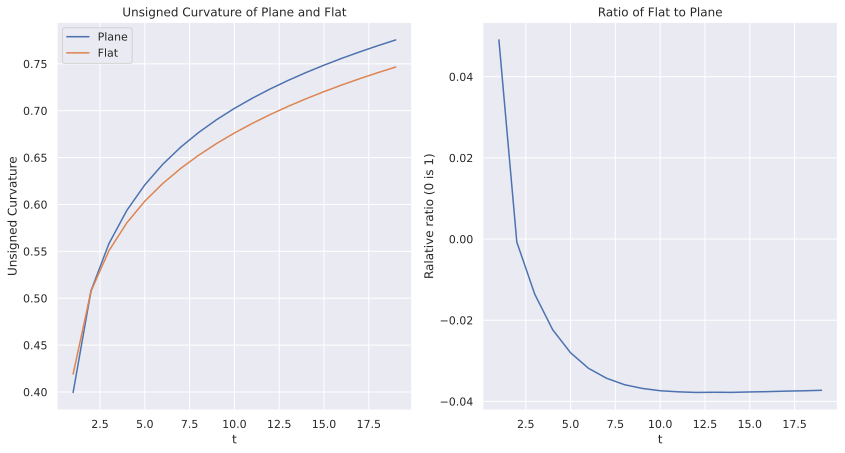

In [ ]:
# plot uks and flat_uks on the same graph, with labels
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].plot(ts,uks,label="Plane")
axs[0].plot(ts,flat_uks,label="Flat")
axs[0].legend()
axs[0].set_xlabel("t")
axs[0].set_ylabel("Unsigned Curvature")
axs[0].set_title("Unsigned Curvature of Plane and Flat")

# Plot the ratio flat_uks/uks
axs[1].plot(ts,np.array(flat_uks)/np.array(uks)-1)
axs[1].set_xlabel("t")
axs[1].set_ylabel("Ralative ratio (0 is 1)")    
axs[1].set_title("Ratio of Flat to Plane")

plt.show()

### Sphere

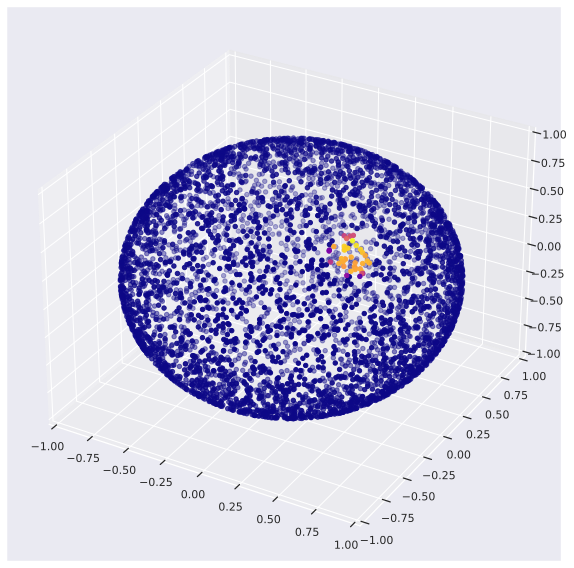

{'params': {'kernel bandwidth': Array([0.04104568], dtype=float32)}}


  0%|          | 0/19 [00:00<?, ?it/s]

In [ ]:
sphere = get_alpha_decay_graph(Xs['sphere'], knn=30, anisotropy=1, )
jump_of_diffusion = DC.unsigned_curvature(sphere,1)[0]
P = diffusion_matrix_from_affinities(sphere.K.todense())
plot_3d(Xs['sphere'], P[0])
ts = np.arange(1,20)
DC = DiffusionCurvature(laziness_method="Entropic",comparison_space_size_factor=2,comparison_method="Subtraction",use_graphs_kernel_parameters=False)


model = EuclideanComparisonSpace(dimension=2, num_points=len(Xs['sphere']), jump_of_diffusion=jump_of_diffusion,)
params = fit_comparison_space_model(model, max_epochs=1000)
print(params)
euclidean_stuffs = model.apply(params) # dictionary containing A, P, D
W = fill_diagonal(euclidean_stuffs['A'],0)
G_flat = pygsp.graphs.Graph(
    W = W,
    lap_type = sphere.lap_type, # type of laplacian; we'll use the same as inputted.
    )


uks = []
flat_uks = []
for t in tqdm(ts):
    uks += [float(DC.unsigned_curvature(sphere,t)[0])]
    flat_uks += [float(DC.unsigned_curvature(G_flat,t)[0])]

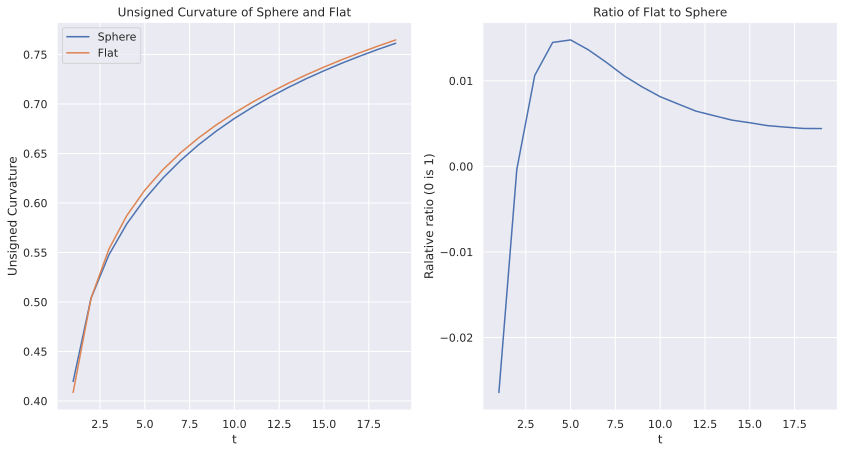

In [ ]:
# plot uks and flat_uks on the same graph, with labels
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].plot(ts,uks,label="Sphere")
axs[0].plot(ts,flat_uks,label="Flat")
axs[0].legend()
axs[0].set_xlabel("t")
axs[0].set_ylabel("Unsigned Curvature")
axs[0].set_title("Unsigned Curvature of Sphere and Flat")

# Plot the ratio flat_uks/uks
axs[1].plot(ts,np.array(flat_uks)/np.array(uks)-1)
axs[1].set_xlabel("t")
axs[1].set_ylabel("Ralative ratio (0 is 1)")    
axs[1].set_title("Ratio of Flat to Sphere")

plt.show()